### Decision Tree Classfier

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)

In [96]:
x=pd.DataFrame(data=iris['data'],columns=iris['feature_names'])

In [97]:
y=pd.DataFrame(data=iris.target,columns=['target'])

In [98]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

#### No need standardisation or normalisation for decision tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()

In [101]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier()

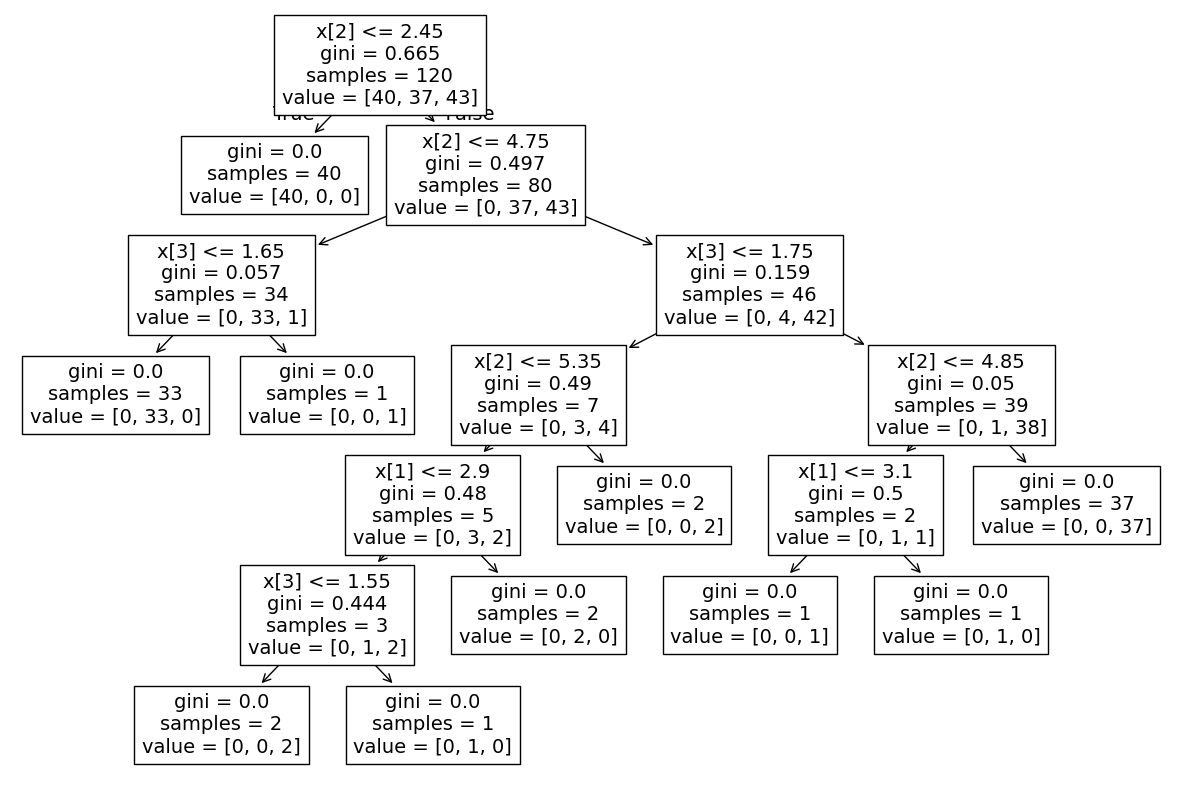

In [102]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=False) ## In the diagram we can cut last 3 levels which lead us to overfitting
plt.show()

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=treemodel.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
report=classification_report(y_test,y_pred)
print(report) ## We may get good accuracy here but by seeing diagram we can say that it is overfitting

Accuracy Score:  0.9333333333333333
Confusion Matrix:  [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [104]:
### Only first 3 levels enough and it can avoid overfitting so max_depth can be 2
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(max_depth=2)
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

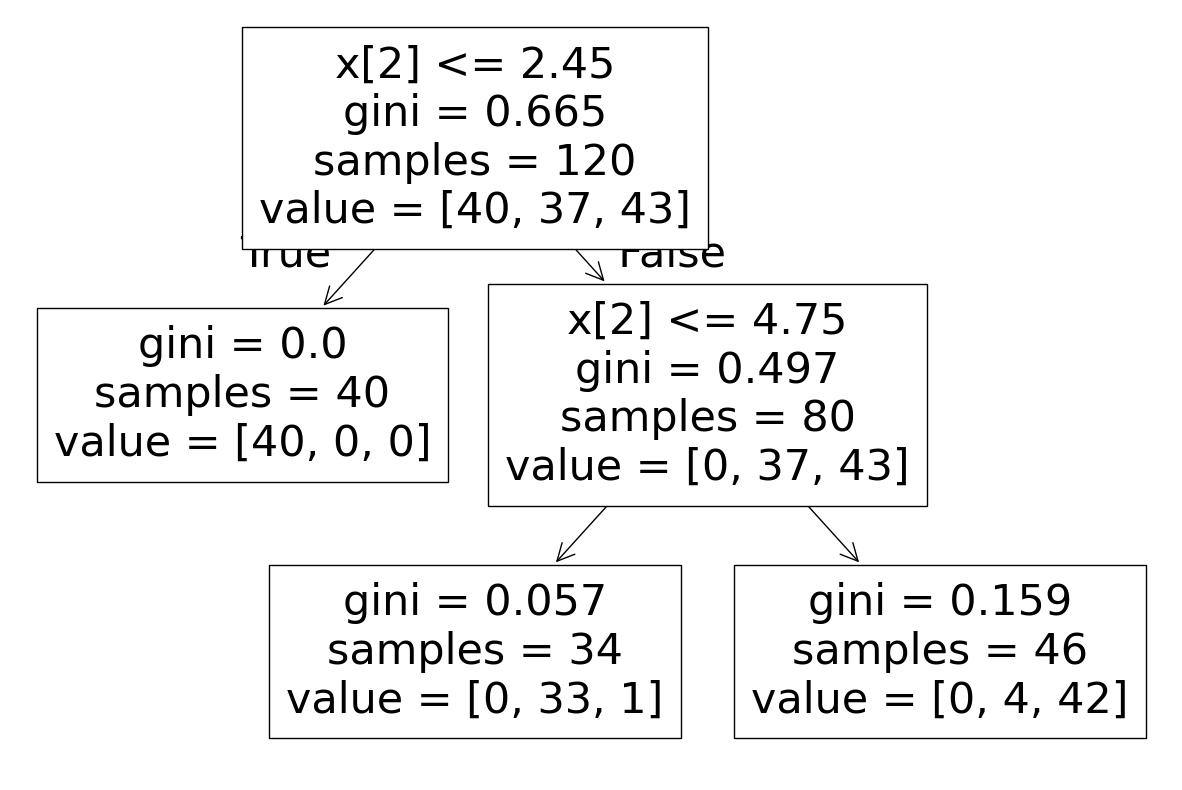

In [105]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=False) 
plt.show() ## Now it is not overfitting

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=treemodel.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
report=classification_report(y_test,y_pred)
print(report)

Accuracy Score:  0.9333333333333333
Confusion Matrix:  [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [107]:
### We can use post prunning for smaller datasets which will reduce time complexity

### Decision Tree Preprunning and HyperParameter Tuning

In [108]:
params={
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
     'max_features':['auto','sqrt','log2']
}

In [109]:
from sklearn.model_selection import GridSearchCV
treemodel=DecisionTreeClassifier()

In [110]:
grid=GridSearchCV(estimator=treemodel,param_grid=params,scoring='accuracy',cv=5)

In [111]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [112]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [113]:
grid.best_score_

np.float64(0.9583333333333334)

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=grid.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",score)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm)
report=classification_report(y_test,y_pred)
print(report)

Accuracy Score:  1.0
Confusion Matrix:  [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

